# Anthropic Economic Index: Insights from Claude 3.7 Sonnet
Replication Notebook

_Handa and Tamkin et al., 2025_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
import numpy as np

palette = sns.color_palette("colorblind")

### Create O*NET / SOC Merged Dataframe

In [ ]:
def merge_onet_soc_data() -> pd.DataFrame:
    """
    Merges O*NET task statements with SOC (Standard Occupational Classification) data
    based on major group codes.
    
    Args:
        onet_path (str): Path to the O*NET task statements CSV file
        soc_path (str): Path to the SOC structure CSV file
    
    Returns:
        pd.DataFrame: Merged DataFrame containing O*NET data with SOC major group titles
    """

    # Read and process O*NET data
    onet_df = pd.read_csv("onet_task_statements.csv")
    onet_df["soc_major_group"] = onet_df["O*NET-SOC Code"].str[:2]
    
    # Read and process SOC data
    soc_df = pd.read_csv("SOC_Structure.csv")
    soc_df = soc_df.dropna(subset=['Major Group'])
    soc_df["soc_major_group"] = soc_df["Major Group"].str[:2]
    
    # Merge datasets
    merged_df = onet_df.merge(
        soc_df[['soc_major_group', 'SOC or O*NET-SOC 2019 Title']],
        on='soc_major_group',
        how='left'
    )

    return merged_df

In [ ]:
task_occupations_df = merge_onet_soc_data()
task_occupations_df["Title"].nunique()

974

In [ ]:
# Update cluster mappings to include data from the merged_df
task_occupations_df["task_normalized"] = task_occupations_df["Task"].str.lower().str.strip()
# Some tasks are included multiple times, so we need to count the number of occurrences per task
task_occupations_df["n_occurrences"] = task_occupations_df.groupby("task_normalized")["Title"].transform("nunique")

task_occupations_df

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source,soc_major_group,SOC or O*NET-SOC 2019 Title,task_normalized,n_occurrences
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent,11,Management Occupations,direct or coordinate an organization's financi...,1
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent,11,Management Occupations,appoint department heads or managers and assig...,1
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent,11,Management Occupations,analyze operations to evaluate performance of ...,1
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent,11,Management Occupations,"direct, plan, or implement policies, objective...",1
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent,11,Management Occupations,"prepare budgets for approval, including those ...",1
...,...,...,...,...,...,...,...,...,...,...,...,...
19525,53-7121.00,"Tank Car, Truck, and Ship Loaders",12806,"Test vessels for leaks, damage, and defects, a...",Supplemental,66.0,12/2006,Incumbent,53,Transportation and Material Moving Occupations,"test vessels for leaks, damage, and defects, a...",1
19526,53-7121.00,"Tank Car, Truck, and Ship Loaders",12807,Unload cars containing liquids by connecting h...,Supplemental,66.0,12/2006,Incumbent,53,Transportation and Material Moving Occupations,unload cars containing liquids by connecting h...,1
19527,53-7121.00,"Tank Car, Truck, and Ship Loaders",12808,Copy and attach load specifications to loaded ...,Supplemental,64.0,12/2006,Incumbent,53,Transportation and Material Moving Occupations,copy and attach load specifications to loaded ...,1
19528,53-7121.00,"Tank Car, Truck, and Ship Loaders",12809,Start pumps and adjust valves or cables to reg...,Supplemental,67.0,12/2006,Incumbent,53,Transportation and Material Moving Occupations,start pumps and adjust valves or cables to reg...,1


### Load Task Mappings and Join

In [ ]:
task_mappings_df = pd.read_csv("task_pct_v2.csv")

In [ ]:
grouped_with_occupations = task_mappings_df.merge(
    task_occupations_df,
    left_on="task_name",
    right_on="task_normalized",
    how="left"
)

grouped_with_occupations["pct_occ_scaled"] = 100 * (grouped_with_occupations["pct"] / grouped_with_occupations["n_occurrences"]) / (grouped_with_occupations["pct"] / grouped_with_occupations["n_occurrences"]).sum()
grouped_with_occupations["pct_occ_scaled"].sum()

100.0

## ANALYSES

### TASKS

In [ ]:
# Set style and increase font sizes
plt.rcParams['font.size'] = 12  # Base font size
plt.rcParams['axes.titlesize'] = 14  # Title font size
plt.rcParams['axes.labelsize'] = 12  # Axis labels size
plt.rcParams['xtick.labelsize'] = 11  # X-axis tick labels size
plt.rcParams['ytick.labelsize'] = 11  # Y-axis tick labels size
plt.rcParams['legend.fontsize'] = 11  # Legend font size
plt.rcParams['figure.titlesize'] = 16  # Figure title size

# If you're using seaborn, you can also set its context
sns.set_context("notebook", font_scale=1.2)

### OCCUPATIONS

In [ ]:
grouped_with_occupations.groupby("Title")["pct_occ_scaled"].sum()

Title
Accountants                                          0.221690
Actors                                               1.061917
Actuaries                                            0.064102
Acupuncturists                                       0.030012
Acute Care Nurses                                    0.044965
                                                       ...   
Wholesale and Retail Buyers, Except Farm Products    0.015058
Wind Energy Operations Managers                      0.001987
Wind Energy Project Managers                         0.005229
Word Processors and Typists                          0.396742
Zoologists and Wildlife Biologists                   0.046429
Name: pct_occ_scaled, Length: 749, dtype: float64

### AUTOMATION VS AUGMENTATION

In [ ]:
automation_vs_augmentation_by_task_df = pd.read_csv("automation_vs_augmentation_by_task.csv") 

In [ ]:
automation_vs_augmentation_with_occupations = grouped_with_occupations.merge(automation_vs_augmentation_by_task_df, on='task_name', how="left")
assert(len(automation_vs_augmentation_with_occupations) == len(grouped_with_occupations))

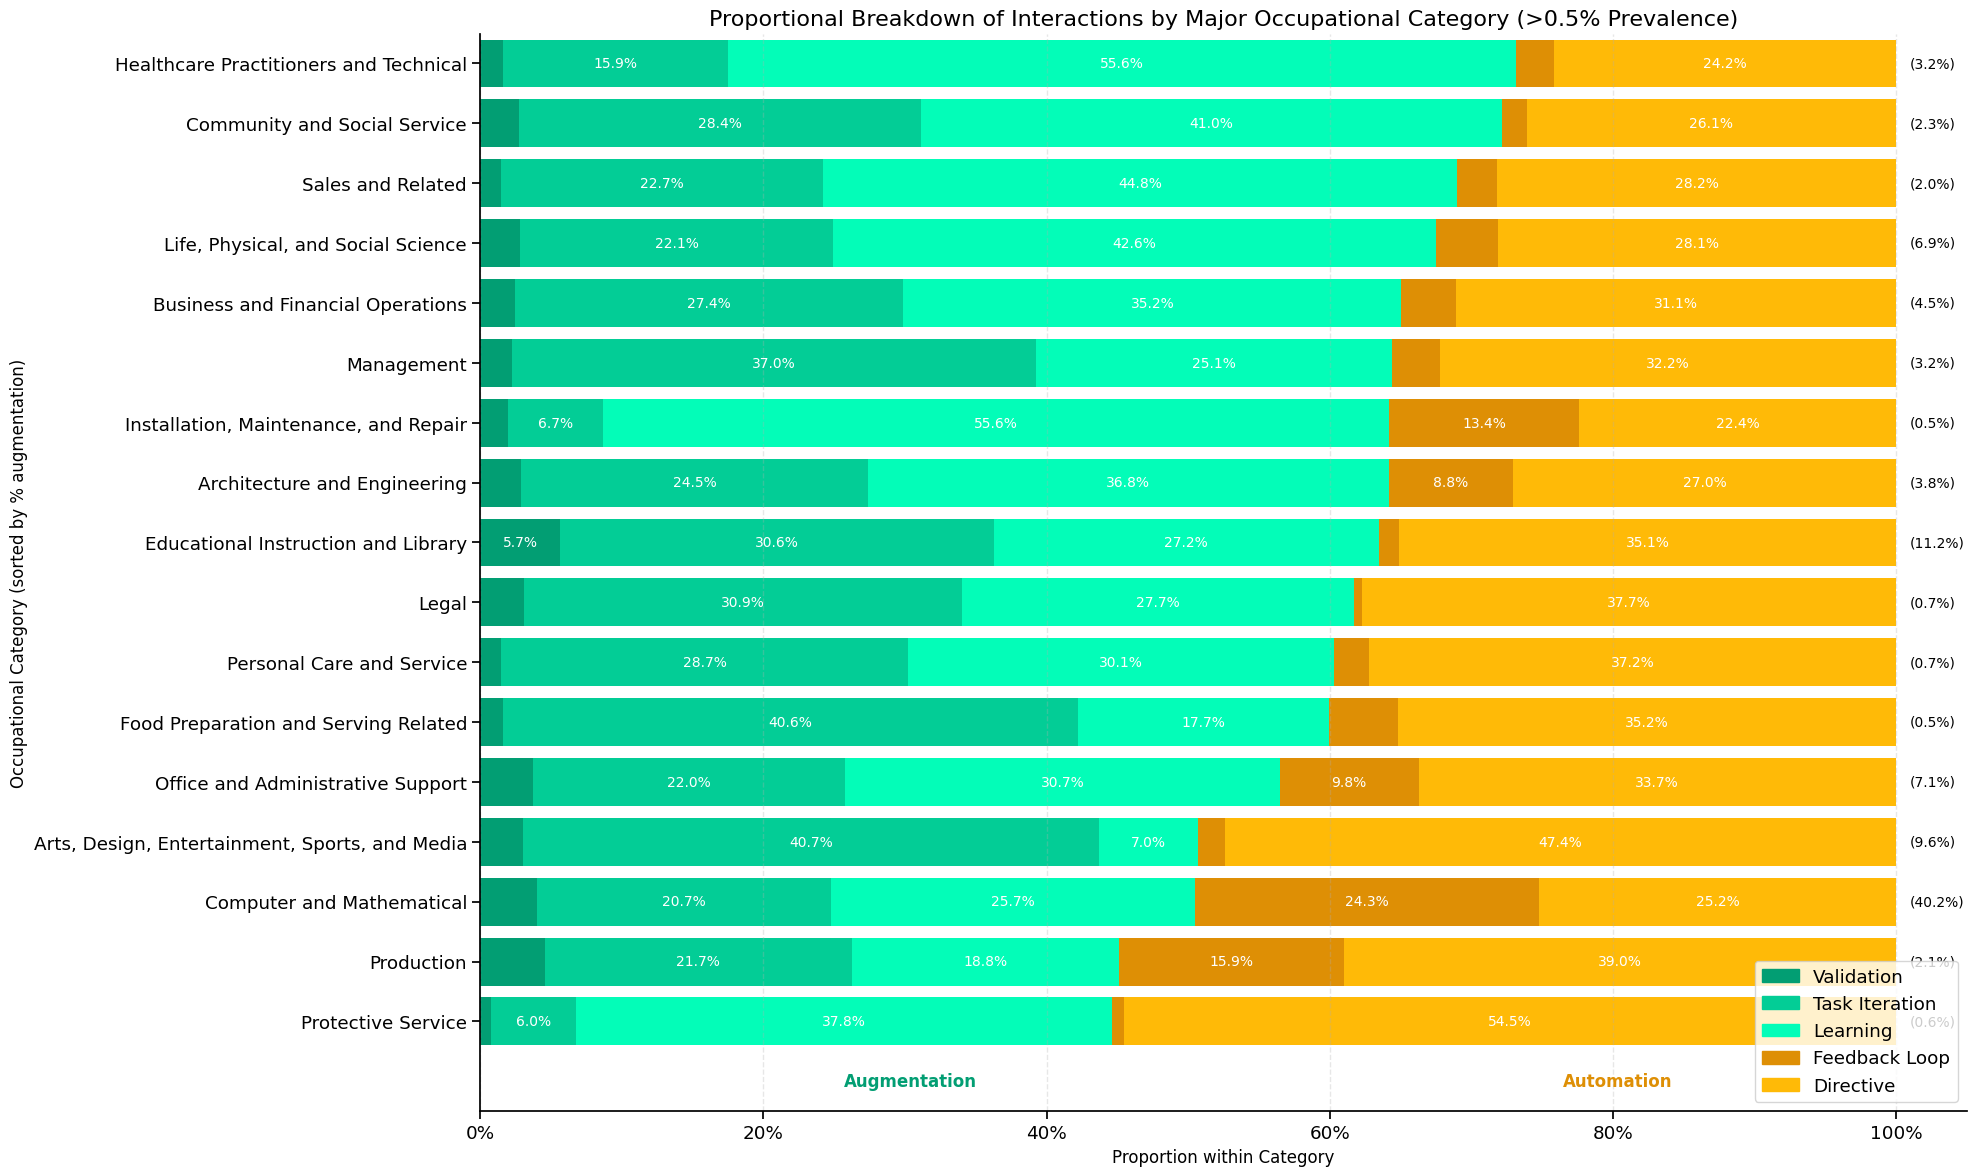

In [ ]:
def plot_normalized_automation_augmentation_by_category(automation_vs_augmentation_with_occupations, min_prevalence=0.5, figsize=(20, 12)):
    """
    Create a visualization showing normalized automation vs augmentation by occupational category.
    
    Args:
        automation_vs_augmentation_with_occupations (pd.DataFrame): DataFrame with occupation and interaction data
        min_prevalence (float): Minimum percentage threshold to include a category
        figsize (tuple): Figure size
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import seaborn as sns
    from textwrap import wrap
    
    # Helper function
    def adjust_color_brightness(color, factor):
        if isinstance(color, str):
            color = mcolors.to_rgb(color)
        return tuple(min(1.0, c * factor) for c in color)

    # Calculate percentages per occupational category
    plot_df = automation_vs_augmentation_with_occupations.groupby("SOC or O*NET-SOC 2019 Title")["pct_occ_scaled"].sum().reset_index()

    # Filter to only include major groups with more than specified prevalence
    plot_df = plot_df[plot_df["pct_occ_scaled"] > min_prevalence]

    # Create clean labels
    plot_df["clean_title"] = plot_df["SOC or O*NET-SOC 2019 Title"].str.replace(" Occupations", "")

    # Define interaction types (excluding filtered)
    interaction_types = ['validation', 'task_iteration', 'learning', 'feedback_loop', 'directive']

    # Calculate normalized interaction percentages for each category
    augmentation_pcts = {}
    interaction_data = {}
    
    for soc_title in plot_df["SOC or O*NET-SOC 2019 Title"].tolist():
        # Get tasks for this category
        category_tasks = automation_vs_augmentation_with_occupations[
            automation_vs_augmentation_with_occupations["SOC or O*NET-SOC 2019 Title"] == soc_title
        ]
        
        total_pct = category_tasks["pct_occ_scaled"].sum()
        
        # Calculate raw percentages
        raw_pcts = {}
        for interaction in interaction_types:
            weighted_sum = (category_tasks[interaction] * category_tasks["pct_occ_scaled"]).sum()
            raw_pcts[interaction] = weighted_sum / total_pct
        
        # Normalize to 100%
        sum_pct = sum(raw_pcts.values())
        normalized_pcts = {interaction: raw_pcts[interaction] / sum_pct for interaction in interaction_types}
        
        # Store data for plotting
        interaction_data[soc_title] = normalized_pcts
        
        # Calculate augmentation percentage for sorting
        augmentation_sum = normalized_pcts['validation'] + normalized_pcts['task_iteration'] + normalized_pcts['learning']
        augmentation_pcts[soc_title] = augmentation_sum
    
    # Add augmentation percentage to dataframe for sorting
    plot_df["augmentation_pct"] = plot_df["SOC or O*NET-SOC 2019 Title"].map(augmentation_pcts)
    
    # Sort by augmentation percentage (lowest to highest)
    plot_df = plot_df.sort_values("augmentation_pct", ascending=True)
    
    # Create figure
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    
    # Set colors using colorblind-friendly palette
    palette = sns.color_palette("colorblind")
    colors = {
        'validation': palette[2],
        'task_iteration': adjust_color_brightness(palette[2], 1.3),
        'learning': adjust_color_brightness(palette[2], 1.6),
        'feedback_loop': palette[1],
        'directive': adjust_color_brightness(palette[1], 1.3)
    }
    
    labels = {
        'validation': 'Validation',
        'task_iteration': 'Task Iteration',
        'learning': 'Learning',
        'feedback_loop': 'Feedback Loop',
        'directive': 'Directive'
    }
    
    # Plot bars for each category in sorted order
    for i, (_, row) in enumerate(plot_df.iterrows()):
        soc_title = row["SOC or O*NET-SOC 2019 Title"]
        category_pcts = interaction_data[soc_title]
        
        left = 0
        for interaction in interaction_types:
            width = category_pcts[interaction]
            
            # Only draw segments above a minimal threshold
            if width > 0.001:
                ax.barh(i, width, left=left, height=0.8, color=colors[interaction])
                
                # Add text label if segment is wide enough
                if width > 0.05:
                    plt.text(left + width/2, i, f'{width*100:.1f}%', 
                            ha='center', va='center', color='white', fontsize=10)
                    
                left += width
        
        # Add total percentage at the end
        category_total = row["pct_occ_scaled"]
        plt.text(1.01, i, f'({category_total:.1f}%)', 
                ha='left', va='center', fontsize=10)
    
    # Set y-tick labels with clean titles
    wrapped_labels = ['\n'.join(wrap(label, width=60)) for label in plot_df["clean_title"]]
    plt.yticks(range(len(plot_df)), wrapped_labels)
    
    # Format x-axis as percentages
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x*100)}%'))
    
    # Add legend
    handles = [plt.Rectangle((0,0), 1, 1, color=colors[interaction]) for interaction in interaction_types]
    legend_labels = [labels[interaction] for interaction in interaction_types]
    plt.legend(handles, legend_labels, loc='lower right')
    
    # Calculate average position between augmentation and automation
    avg_aug_position = sum(augmentation_pcts.values()) / len(augmentation_pcts)
    
    plt.text(avg_aug_position/2, -1, 'Augmentation', ha='center', va='center', 
             fontsize=12, color=palette[2], fontweight='bold')
    plt.text(avg_aug_position + (1-avg_aug_position)/2, -1, 'Automation', ha='center', va='center', 
             fontsize=12, color=palette[1], fontweight='bold')
    
    # Customize the plot
    plt.title('Proportional Breakdown of Interactions by Major Occupational Category (>{:.1f}% Prevalence)'.format(min_prevalence), fontsize=16)
    plt.xlabel('Proportion within Category', fontsize=12)
    plt.ylabel('Occupational Category (sorted by % augmentation)', fontsize=12)
    
    # Add grid
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    
    # Set axis limits
    plt.xlim(0, 1.05)
    plt.ylim(-1.5, len(plot_df) - 0.5)
    
    # Remove unnecessary spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

# Call the function
fig = plot_normalized_automation_augmentation_by_category(automation_vs_augmentation_with_occupations)
fig.savefig('normalized_automation_by_category.png', dpi=300, bbox_inches='tight')

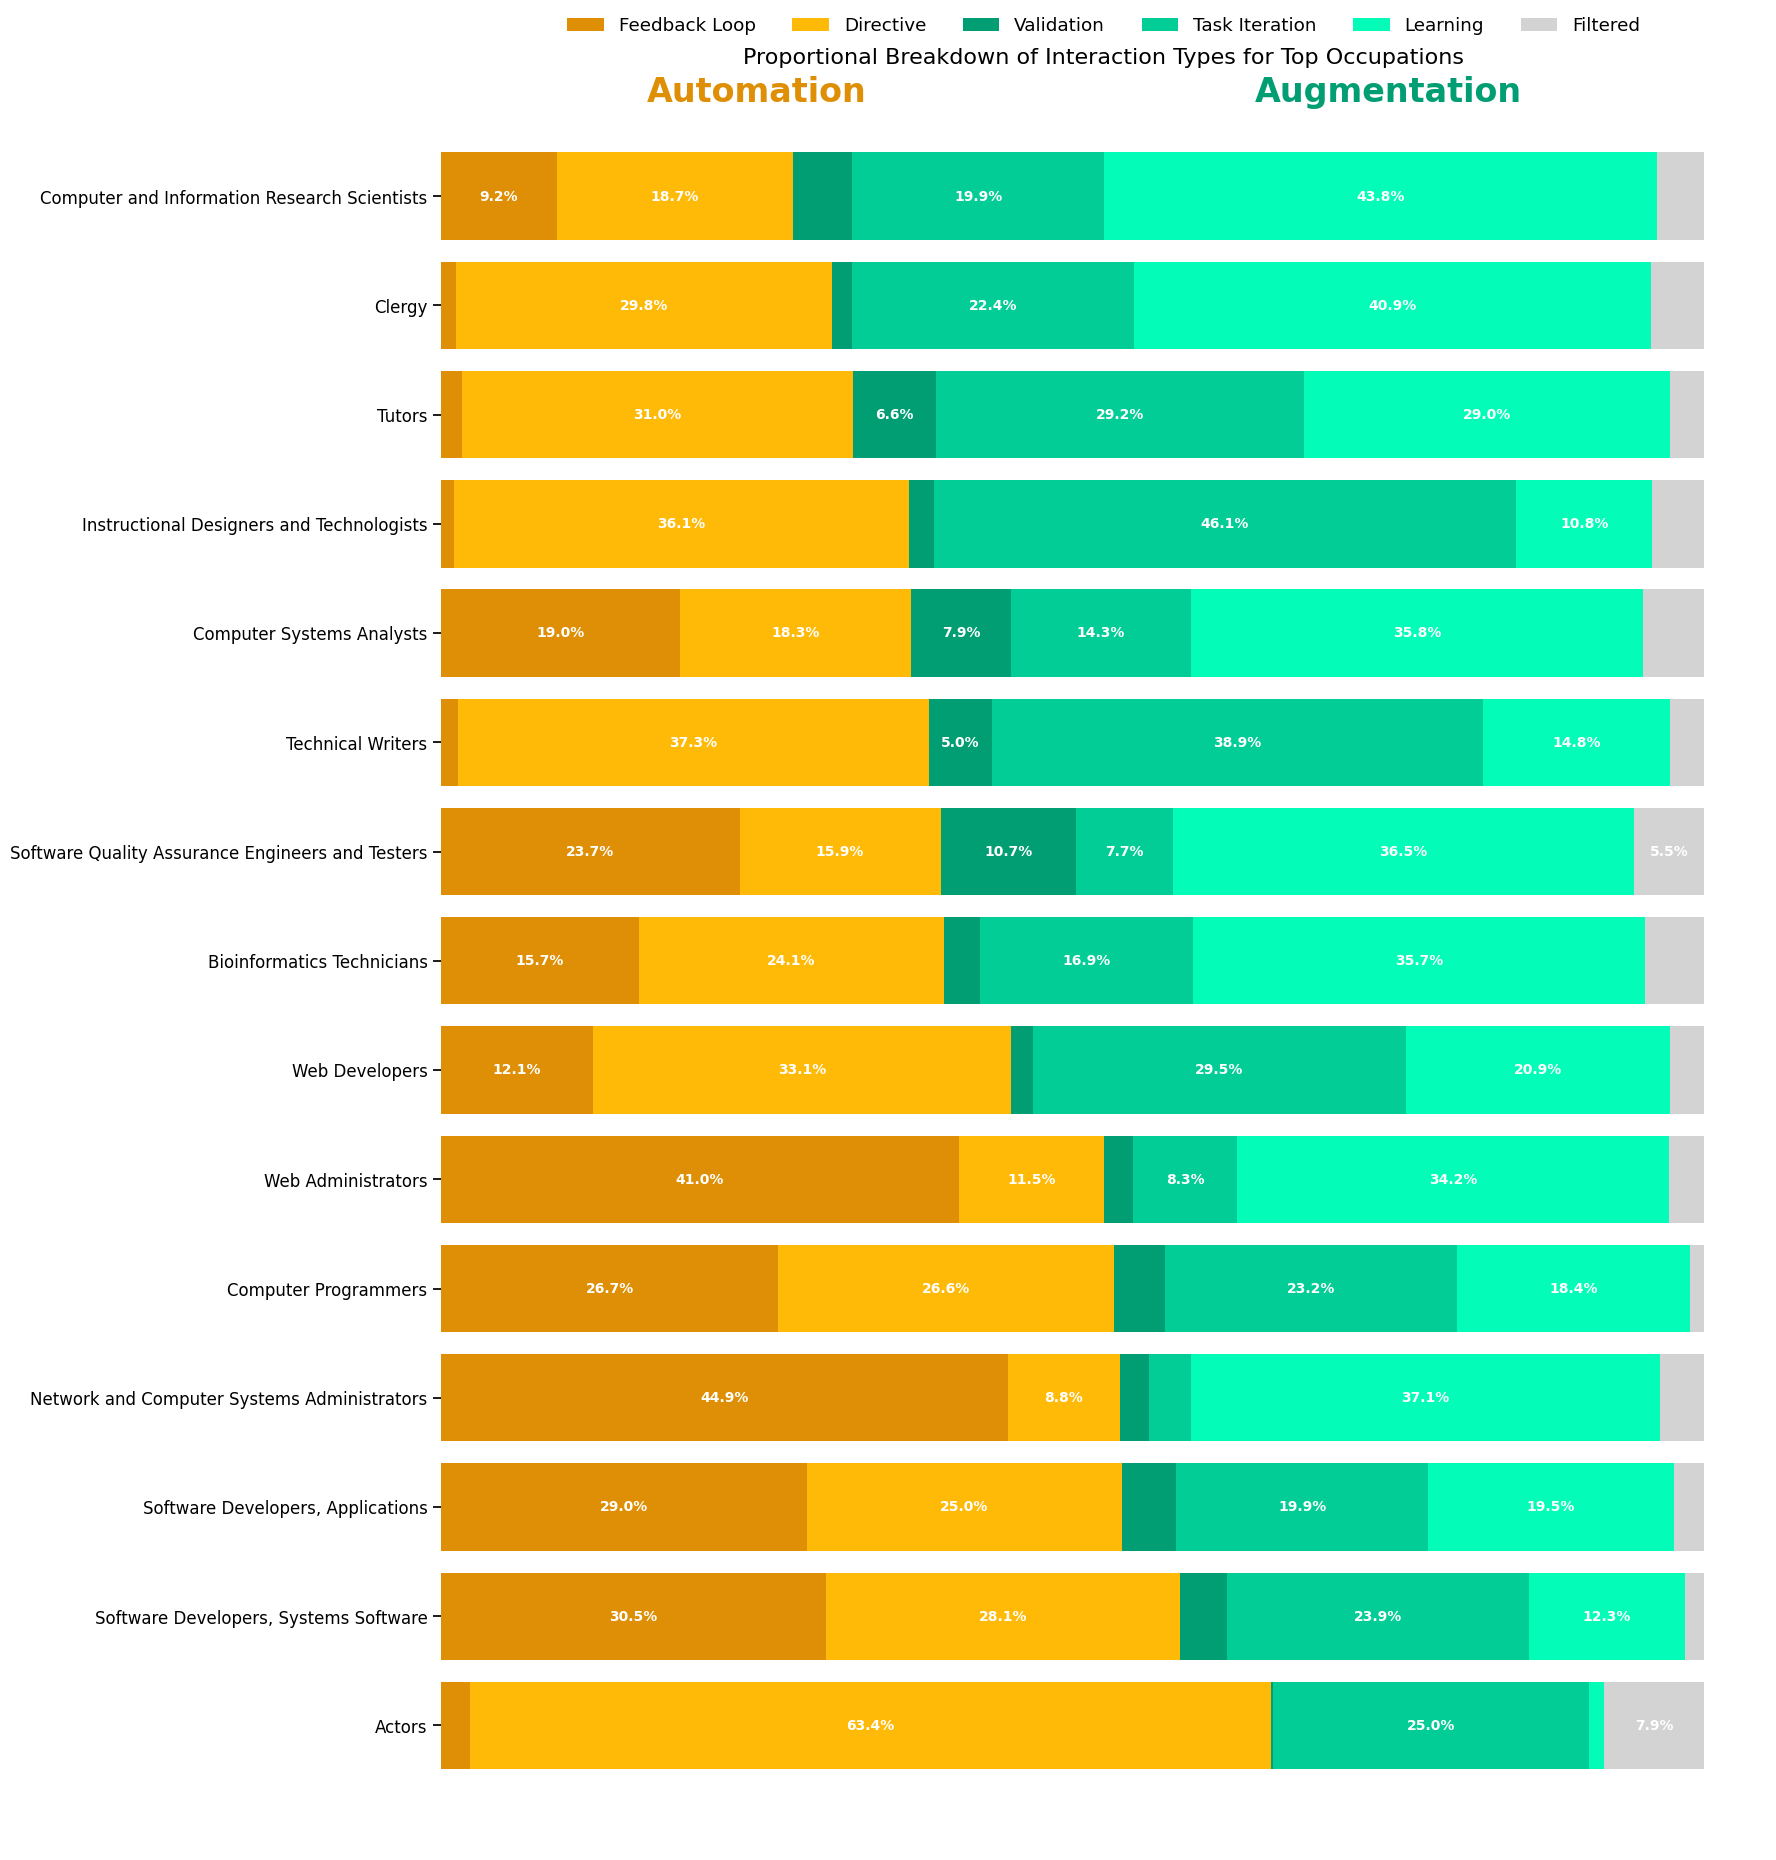

In [ ]:
def plot_proportional_automation_augmentation_by_occupation(automation_vs_augmentation_with_occupations, top_n=15, figsize=(18, 20)):
    """
    Create a visualization showing the proportional breakdown of automation vs augmentation 
    interaction types for top occupations.
    
    Args:
        automation_vs_augmentation_with_occupations (pd.DataFrame): DataFrame with occupation and interaction data
        top_n (int): Number of top occupations to display
        figsize (tuple): Figure size
        
    Returns:
        matplotlib.figure.Figure: The created figure
        pd.DataFrame: Data used for plotting
    """
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import numpy as np
    import seaborn as sns
    import textwrap
    
    # Helper function for adjusting color brightness
    def adjust_color_brightness(color, factor):
        if isinstance(color, str):
            color = mcolors.to_rgb(color)
        return tuple(min(1.0, c * factor) for c in color)

    # Get top occupations by overall percentage
    plot_df = automation_vs_augmentation_with_occupations.groupby("Title").agg({
        "pct_occ_scaled": "sum",
    }).reset_index()
    plot_df = plot_df.sort_values(by="pct_occ_scaled", ascending=False).head(top_n)
    
    # Define interaction types
    interaction_types = ["feedback_loop", "directive", "validation", "task_iteration", "learning", "filtered"]
    
    # Calculate interaction ratios for each occupation
    for interaction in interaction_types:
        ratios = []
        for title in plot_df['Title']:
            occupation_tasks = automation_vs_augmentation_with_occupations[
                automation_vs_augmentation_with_occupations["Title"] == title
            ]
            weighted_sum = sum(occupation_tasks[interaction] * occupation_tasks["pct_occ_scaled"])
            total_sum = sum(occupation_tasks["pct_occ_scaled"])
            ratio = weighted_sum / total_sum if total_sum > 0 else 0
            ratios.append(ratio)
        plot_df[f'{interaction}_ratio'] = ratios
    
    # Calculate automation and augmentation totals
    plot_df["augmentation_weighted_ratio"] = plot_df["validation_ratio"] + plot_df["task_iteration_ratio"] + plot_df["learning_ratio"]
    plot_df["automation_weighted_ratio"] = plot_df["directive_ratio"] + plot_df["feedback_loop_ratio"]
    
    # Sort by automation ratio
    plot_df = plot_df.sort_values("automation_weighted_ratio", ascending=False)
    
    # Create clean labels after sorting
    plot_df['clean_titles'] = plot_df['Title'].str.replace(' Occupations', '')
    wrapped_labels = [textwrap.fill(label, width=60) for label in plot_df['clean_titles']]
    
    # Create figure
    fig = plt.figure(figsize=figsize)
    
    # Set colors using colorblind-friendly palette
    palette = sns.color_palette("colorblind")
    colors = {
        'validation': palette[2],                         # Augmentation
        'task_iteration': adjust_color_brightness(palette[2], 1.3),  # Augmentation
        'learning': adjust_color_brightness(palette[2], 1.6),   # Augmentation
        'feedback_loop': palette[1],                      # Automation
        'directive': adjust_color_brightness(palette[1], 1.3),  # Automation
        'filtered': 'lightgray'                               # Filtered
    }
    
    # Define labels for legend
    labels = {
        'validation': 'Validation',
        'task_iteration': 'Task Iteration',
        'learning': 'Learning',
        'feedback_loop': 'Feedback Loop',
        'directive': 'Directive',
        'filtered': 'Filtered'
    }
    
    # Plot stacked bars
    y_pos = np.arange(len(plot_df))
    
    # Track left positions for each bar
    left_positions = np.zeros(len(plot_df))
    
    # Create dictionary to store bars for legend
    all_bars = {}
    
    # Plot each interaction type
    for interaction in interaction_types:
        values = plot_df[f'{interaction}_ratio'].values
        all_bars[interaction] = plt.barh(y_pos, values, left=left_positions, 
                                        color=colors[interaction], label=labels[interaction])
        # Update left positions after each bar
        left_positions = left_positions + values
    
    # Add percentage labels (only where there's enough space)
    min_width_for_label = 0.05  # Minimum width (5%) to display a label
    for i, (_, row) in enumerate(plot_df.iterrows()):
        pos = 0
        for interaction in interaction_types:
            ratio = row[f'{interaction}_ratio']
            # Only show label if segment is wide enough
            if ratio > min_width_for_label:
                plt.text(pos + ratio/2, i, f'{ratio*100:.1f}%', 
                       ha='center', va='center', color='white', fontsize=10, fontweight='bold')
            pos += ratio
    
    # Set up the rest of the visualization
    plt.yticks(range(len(plot_df)), wrapped_labels, fontsize=12)
    plt.xticks([])
    plt.xlabel('')
    
    # Create legend
    ordered_handles = [all_bars[interaction] for interaction in interaction_types]
    ordered_labels = [labels[interaction] for interaction in interaction_types]
    plt.legend(ordered_handles, ordered_labels, loc='upper center', 
              bbox_to_anchor=(0.5, 1.04), ncol=6, frameon=False)
    
    # Add category labels
    auto_color = colors["feedback_loop"]
    aug_color = colors["validation"]
    plt.text(0.25, len(plot_df) + -0.2, 'Automation', ha='center', va='bottom', 
            fontsize=24, fontweight='bold', color=auto_color)
    plt.text(0.75, len(plot_df) + -0.2, 'Augmentation', ha='center', va='bottom', 
            fontsize=24, fontweight='bold', color=aug_color)
    
    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    # Add title
    plt.title('Proportional Breakdown of Interaction Types for Top Occupations', fontsize=16)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    return fig, plot_df

# Execute and save
fig, result_df = plot_proportional_automation_augmentation_by_occupation(automation_vs_augmentation_with_occupations)
fig.savefig('automation_augmentation_by_occupation.png', dpi=300, bbox_inches='tight')

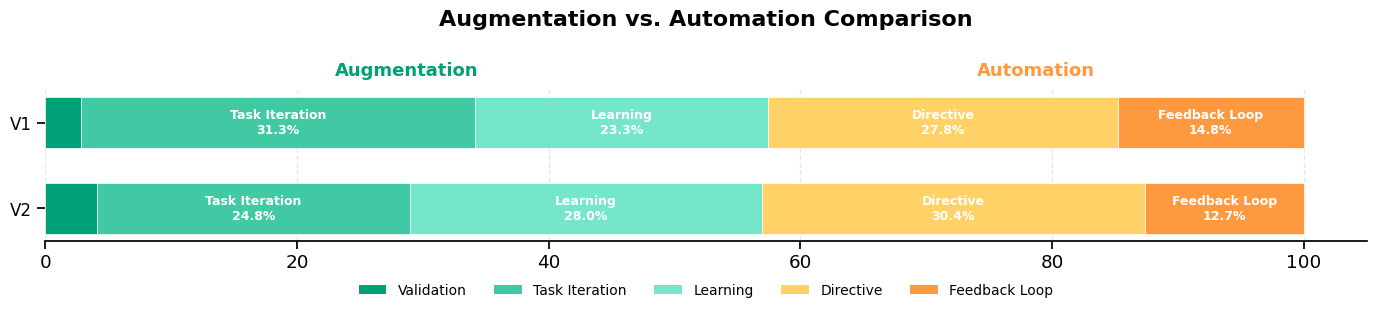

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def compare_automation_augmentation_versions():
    """
    Compare the automation vs. augmentation distributions between V1 and V2 datasets,
    loading data directly from CSV files.
    """
    # Load data from CSV files
    v1_data = pd.read_csv('automation_vs_augmentation_v1.csv')
    v2_data = pd.read_csv('automation_vs_augmentation_v2.csv')
    
    # Define interaction types by category - including validation this time
    augmentation_types = ['validation', 'task iteration', 'learning']  # Added validation back
    automation_types = ['directive', 'feedback loop']
    all_types = augmentation_types + automation_types
    
    # Only remove 'none' entries (keep validation now)
    v1_data_filtered = v1_data[~v1_data['interaction_type'].str.lower().isin(['none'])].copy()
    v2_data_filtered = v2_data[~v2_data['interaction_type'].str.lower().isin(['none'])].copy()
    
    # Normalize the remaining values (using .loc to avoid warnings)
    v1_data_filtered.loc[:, 'pct'] = v1_data_filtered['pct'] / v1_data_filtered['pct'].sum() * 100
    v2_data_filtered.loc[:, 'pct'] = v2_data_filtered['pct'] / v2_data_filtered['pct'].sum() * 100
    
    # Create dictionaries to store percentages
    v1_interaction_totals = {}
    v2_interaction_totals = {}
    
    # Fill in the dictionaries with normalized percentages
    for _, row in v1_data_filtered.iterrows():
        v1_interaction_totals[row['interaction_type'].lower()] = row['pct'] / 100
        
    for _, row in v2_data_filtered.iterrows():
        v2_interaction_totals[row['interaction_type'].lower()] = row['pct'] / 100
    
    # Calculate automation and augmentation totals
    v1_augmentation = sum(v1_interaction_totals.get(i.lower(), 0) for i in augmentation_types)
    v1_automation = sum(v1_interaction_totals.get(i.lower(), 0) for i in automation_types)
    
    v2_augmentation = sum(v2_interaction_totals.get(i.lower(), 0) for i in augmentation_types)
    v2_automation = sum(v2_interaction_totals.get(i.lower(), 0) for i in automation_types)
    
    # Create visualization
    # Define colors for each interaction type
    colors = {
        'validation': '#00A078',          # Dark green for validation
        'task iteration': '#40C9A2',      # Medium green for task iteration
        'learning': '#75E6CA',            # Light green for learning
        'feedback loop': '#FF9940',       # Dark orange for feedback loop
        'directive': '#FFD166'            # Light orange for directive
    }

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 4.5))

    # Set bar height and positions
    height = 0.6
    y_positions = [2, 1]  # For V1 and V2
    labels = ['V1', 'V2']

    # Draw segments for both datasets
    for dataset_idx, y_pos in enumerate(y_positions):
        # Use the corresponding data
        interaction_totals = v1_interaction_totals if dataset_idx == 0 else v2_interaction_totals
        left = 0
        
        # First draw augmentation types
        for interaction in augmentation_types:
            value = interaction_totals.get(interaction.lower(), 0) * 100  # Convert to percentage
            
            # Draw segment
            ax.barh(y_pos, value, left=left, height=height, 
                    color=colors[interaction], edgecolor='white', linewidth=0.5)
            
            # Add label if segment is wide enough, but skip validation as requested
            if value > 4 and interaction != 'validation':
                ax.text(left + value/2, y_pos, f"{interaction.title()}\n{value:.1f}%", 
                        ha='center', va='center', color='white', fontweight='bold', fontsize=9)
            
            # Update starting position
            left += value
        
        # Then draw automation types
        for interaction in automation_types:
            value = interaction_totals.get(interaction.lower(), 0) * 100
            
            # Draw segment
            ax.barh(y_pos, value, left=left, height=height, 
                    color=colors[interaction], edgecolor='white', linewidth=0.5)
            
            # Add label if segment is wide enough
            if value > 4:
                ax.text(left + value/2, y_pos, f"{interaction.title()}\n{value:.1f}%", 
                        ha='center', va='center', color='white', fontweight='bold', fontsize=9)
            
            # Update starting position
            left += value

    # Calculate overall values for category labels
    v1_augmentation_pct = v1_augmentation * 100
    v1_automation_pct = v1_automation * 100

    # Add overall category labels at the top with more space - slightly smaller font
    ax.text(v1_augmentation_pct/2, 2.6, "Augmentation", ha='center', va='center', 
            color='#00A078', fontweight='bold', fontsize=13)
    ax.text(v1_augmentation_pct + v1_automation_pct/2, 2.6, "Automation", ha='center', va='center', 
            color='#FF9940', fontweight='bold', fontsize=13)

    # Configure the plot
    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels, fontsize=12)
    ax.set_xlim(0, 105)  # Give some space on the right

    # Set title
    plt.title('Augmentation vs. Automation Comparison', fontsize=16, fontweight='bold', pad=30, y=1.15)

    # Create legend for all relevant types - smaller font
    legend_elements = []
    for interaction in all_types:
        legend_elements.append(Patch(facecolor=colors[interaction], 
                                    label=interaction.title()))

    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), 
            ncol=len(all_types), frameon=False, fontsize=10)

    # Remove spines
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    # Add grid for readability
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig('automation_augmentation_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()    
    
    return fig, v1_interaction_totals, v2_interaction_totals

# Run the comparison (discard return values to avoid printing)
_ = compare_automation_augmentation_versions()

Summary Statistics:
Old Data: Mean task coverage per occupation: 0.21
New Data: Mean task coverage per occupation: 0.20

Percentage of occupations with at least:
25.0% of tasks: Old=36.2%, New=34.8% (Change: -1.4%)
50.0% of tasks: Old=11.5%, New=10.3% (Change: -1.2%)
75.0% of tasks: Old=4.1%, New=3.6% (Change: -0.5%)


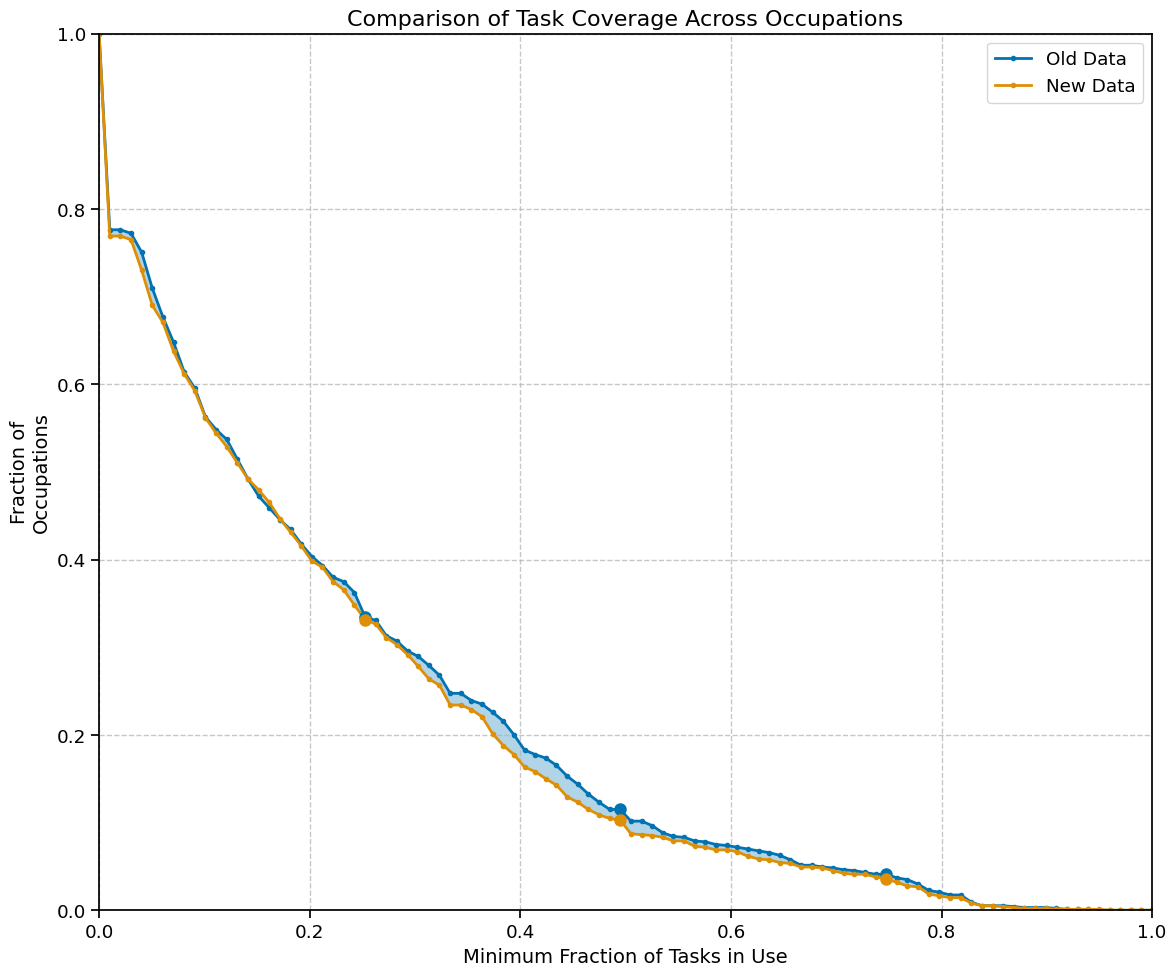

In [ ]:
def plot_task_coverage_comparison(task_occupations_df, figsize=(12, 10)):
    """
    Create a comparison plot of task coverage across occupations for old and new data.
    
    Args:
        task_occupations_df (pd.DataFrame): DataFrame with task and occupation data
        figsize (tuple): Figure size
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from matplotlib.colors import to_rgba
    
    # Function to calculate task coverage for a given dataset
    def calculate_occupation_task_coverage(task_mappings_file, task_occupations_df):
        # Load task mappings data
        task_mappings = pd.read_csv(task_mappings_file)
        task_mappings["task_name"] = task_mappings["task_name"].str.lower().str.strip()
        
        # Merge with occupation data
        merged_df = task_mappings.merge(
            task_occupations_df,
            left_on="task_name",
            right_on="task_normalized",
            how="left"
        )
        
        # Count unique tasks per occupation in the merged dataset
        tasks_in_use = merged_df[["Title", "Task"]].dropna().drop_duplicates()
        tasks_in_use_per_occ = tasks_in_use.groupby("Title")["Task"].count()
        
        # Get total tasks per occupation from the original occupation data
        total_tasks_per_occ = task_occupations_df.groupby("Title")["Task"].nunique()
        
        # Create a dataframe with the results
        coverage_df = pd.DataFrame({
            "total_tasks": total_tasks_per_occ,
            "tasks_in_use": tasks_in_use_per_occ
        }).fillna(0)
        
        # Calculate the fraction of tasks in use for each occupation
        coverage_df["fraction_in_use"] = coverage_df["tasks_in_use"] / coverage_df["total_tasks"]
        
        # Sort values by the fraction
        coverage_df = coverage_df.sort_values("fraction_in_use", ascending=False)
        
        return coverage_df

    # Calculate coverage for old and new data
    old_coverage = calculate_occupation_task_coverage("task_pct_v1.csv", task_occupations_df)
    new_coverage = calculate_occupation_task_coverage("task_pct_v2.csv", task_occupations_df)

    # Calculate the distribution curves
    thresholds = np.linspace(0, 1, 100)
    old_fractions = []
    new_fractions = []

    for threshold in thresholds:
        old_fraction = (old_coverage["fraction_in_use"] >= threshold).mean()
        new_fraction = (new_coverage["fraction_in_use"] >= threshold).mean()
        old_fractions.append(old_fraction)
        new_fractions.append(new_fraction)

    # Create the plot
    fig = plt.figure(figsize=figsize)

    # Set colors using the colorblind-friendly palette
    palette = sns.color_palette("colorblind")
    old_color = palette[0]  # Orange
    new_color = palette[1]  # Blue

    # Plot both curves
    plt.plot(thresholds, old_fractions, 'o-', color=old_color, linewidth=2, markersize=3, 
             label='Old Data')
    plt.plot(thresholds, new_fractions, 'o-', color=new_color, linewidth=2, markersize=3,
             label='New Data')

    # Fill between the curves to highlight differences
    plt.fill_between(thresholds, old_fractions, new_fractions, 
                     where=(np.array(new_fractions) > np.array(old_fractions)),
                     color=to_rgba(new_color, 0.3), interpolate=True)
    plt.fill_between(thresholds, old_fractions, new_fractions, 
                     where=(np.array(old_fractions) > np.array(new_fractions)),
                     color=to_rgba(old_color, 0.3), interpolate=True)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Highlight specific points for both datasets
    key_thresholds = [0.25, 0.50, 0.75]
    old_key_points = []
    new_key_points = []

    for threshold in key_thresholds:
        idx = (np.abs(thresholds - threshold)).argmin()
        
        # Old data points
        old_key_points.append((thresholds[idx], old_fractions[idx]))
        plt.plot(thresholds[idx], old_fractions[idx], 'o', color=old_color, markersize=8)
        
        # New data points
        new_key_points.append((thresholds[idx], new_fractions[idx]))
        plt.plot(thresholds[idx], new_fractions[idx], 'o', color=new_color, markersize=8)

    # Set labels and title
    plt.xlabel("Minimum Fraction of Tasks in Use", fontsize=14)
    plt.ylabel("Fraction of\nOccupations", fontsize=14)
    plt.title("Comparison of Task Coverage Across Occupations", fontsize=16)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend(loc='upper right')

    plt.tight_layout()
    
    # Print summary statistics
    print("Summary Statistics:")
    print(f"Old Data: Mean task coverage per occupation: {old_coverage['fraction_in_use'].mean():.2f}")
    print(f"New Data: Mean task coverage per occupation: {new_coverage['fraction_in_use'].mean():.2f}")

    print("\nPercentage of occupations with at least:")
    for threshold in key_thresholds:
        old_pct = (old_coverage["fraction_in_use"] >= threshold).mean() * 100
        new_pct = (new_coverage["fraction_in_use"] >= threshold).mean() * 100
        diff = new_pct - old_pct
        sign = "+" if diff > 0 else ""
        print(f"{threshold*100}% of tasks: Old={old_pct:.1f}%, New={new_pct:.1f}% (Change: {sign}{diff:.1f}%)")
    
    return fig

# Call the function if data is available
if 'task_occupations_df' in globals():
    plot_task_coverage_comparison(task_occupations_df)

Tasks in old data with no occupation mapping (expecting 1 for 'none'): 1
Tasks in new data with no occupation mapping (expecting 1 for 'none'): 1
Sum of old percentages: 100.0%
Sum of new percentages: 100.0%


<ipython-input-15-a11231a5d327>:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust for title  #176:     plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust for title


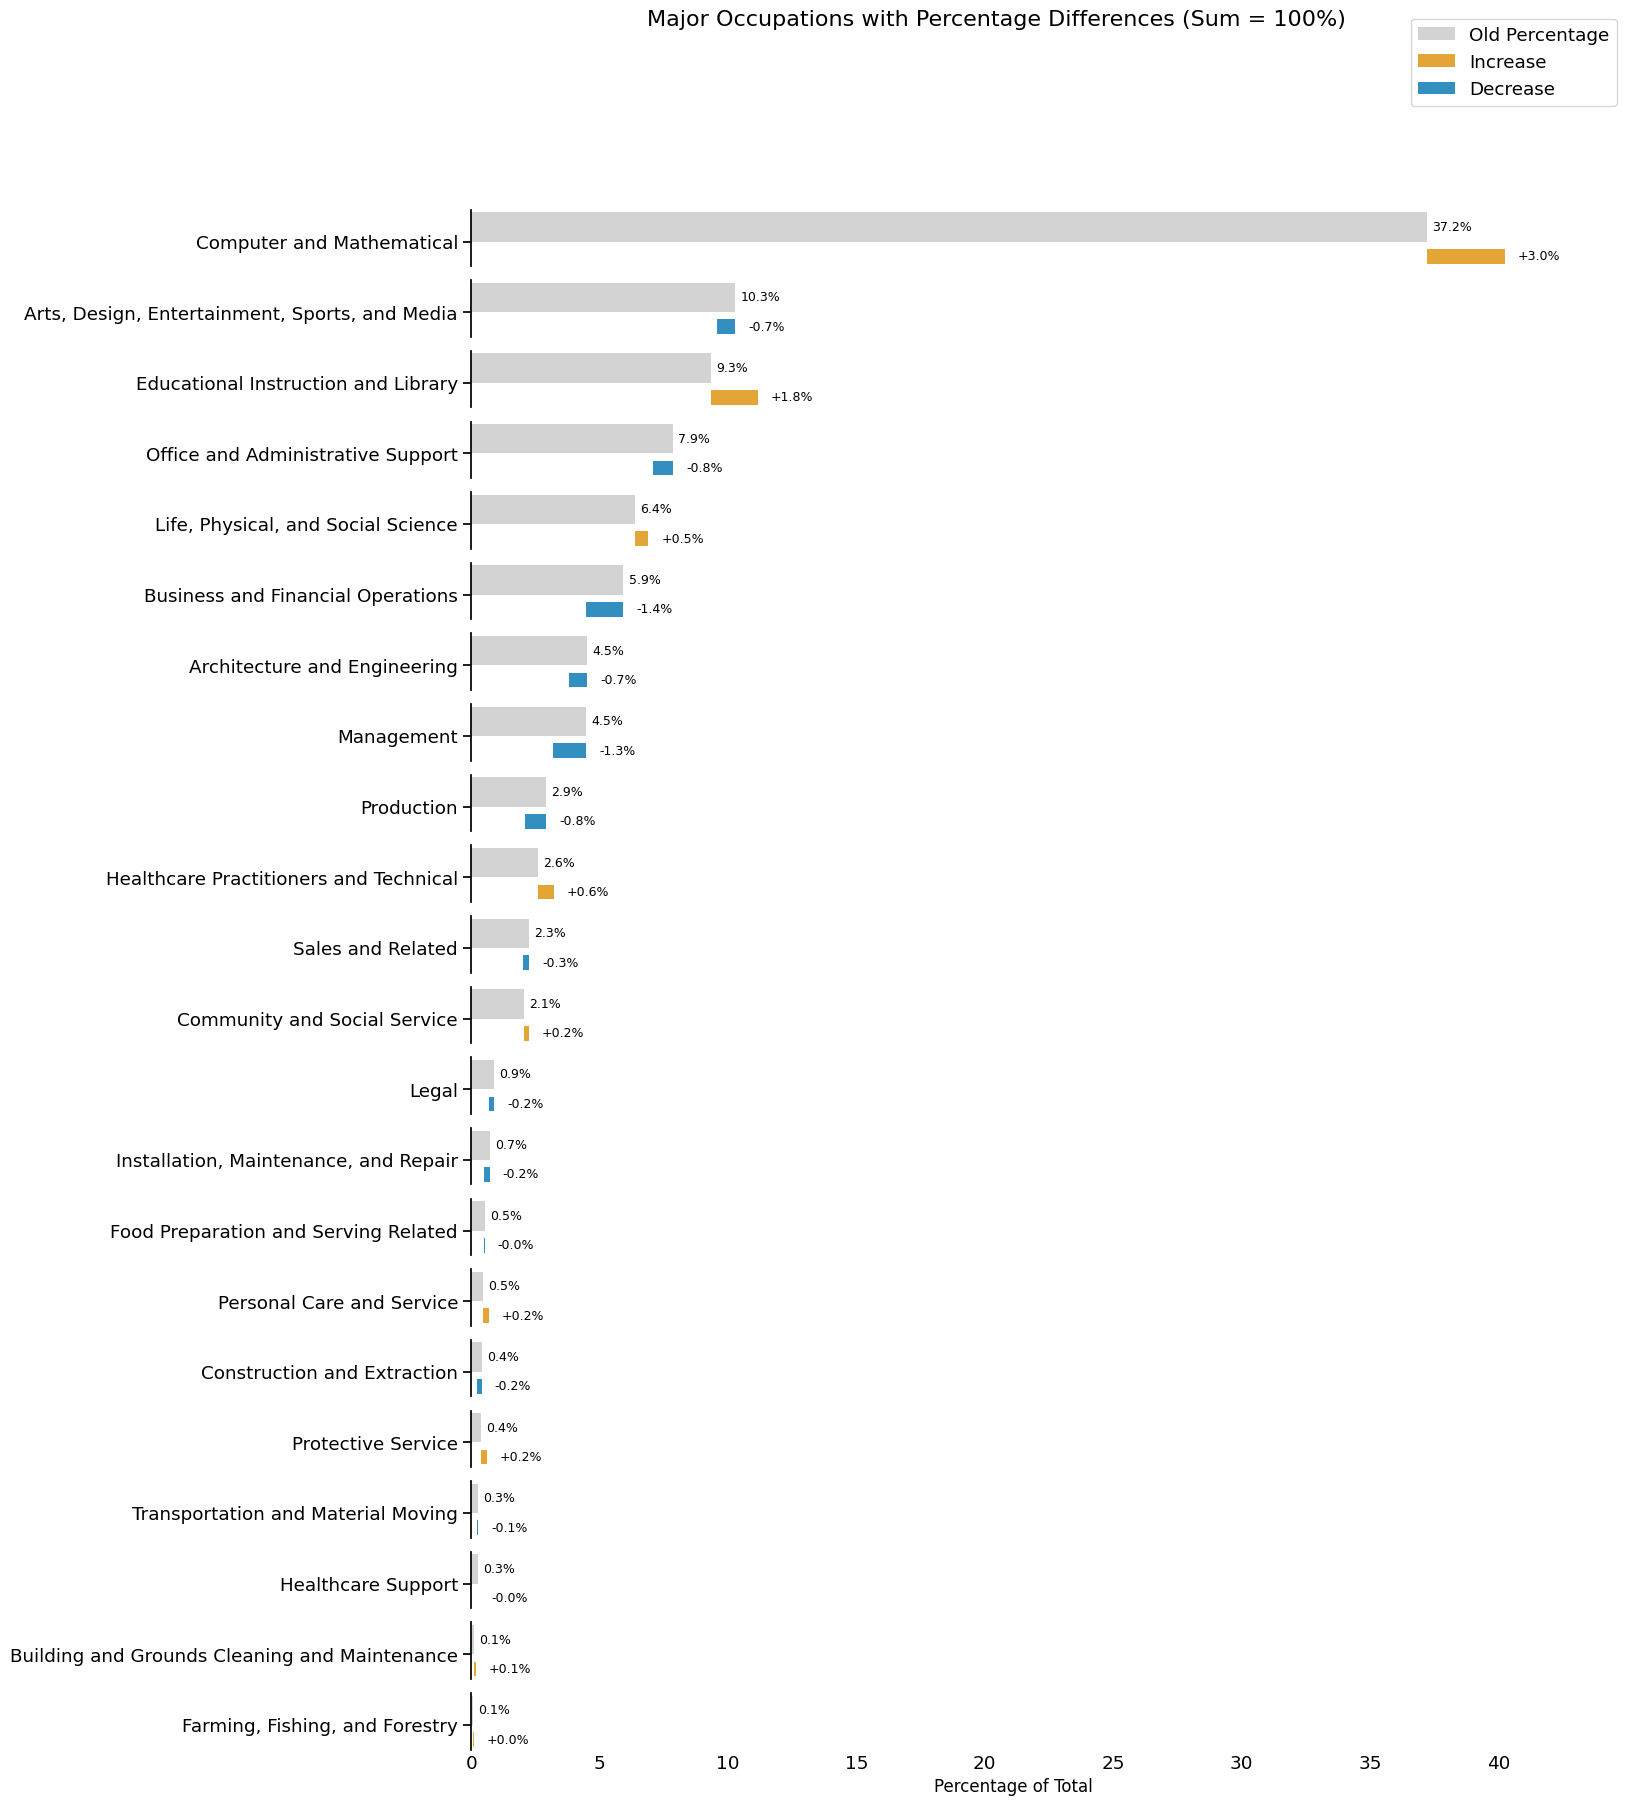

In [ ]:
def plot_normalized_major_occupations():
    """
    Create a visualization of major occupations with normalized percentages
    that sum to 100%, with difference indicators for comparing old vs new data.
    """
    # Step 1: Load the required data
    old_data = pd.read_csv("task_pct_v1.csv")
    new_data = pd.read_csv("task_pct_v2.csv")
    task_occ_df = merge_onet_soc_data()
    
    # Step 2: Normalize task names consistently
    old_data['task_name'] = old_data['task_name'].str.lower().str.strip()
    new_data['task_name'] = new_data['task_name'].str.lower().str.strip()
    task_occ_df["task_normalized"] = task_occ_df["Task"].str.lower().str.strip()
    
    # Step 3: For each task, count in how many occupations it appears
    task_occupation_counts = task_occ_df.groupby('task_normalized')['Title'].nunique().reset_index(name='occupation_count')
    
    # Step 4: Join task percentages with occupation counts
    old_data_with_counts = old_data.merge(
        task_occupation_counts,
        left_on='task_name',
        right_on='task_normalized',
        how='left'
    )
    new_data_with_counts = new_data.merge(
        task_occupation_counts,
        left_on='task_name',
        right_on='task_normalized',
        how='left'
    )
    
    # Step 5: Handle missing occupation counts (should be 1 missing occupation for "none")
    # Check how many tasks have no occupation mapping
    old_missing = old_data_with_counts['occupation_count'].isna().sum()
    new_missing = new_data_with_counts['occupation_count'].isna().sum()
    
    print(f"Tasks in old data with no occupation mapping (expecting 1 for 'none'): {old_missing}")
    print(f"Tasks in new data with no occupation mapping (expecting 1 for 'none'): {new_missing}")
    
    # Filter out tasks with no occupation mapping
    old_data_with_counts = old_data_with_counts.dropna(subset=['occupation_count'])
    new_data_with_counts = new_data_with_counts.dropna(subset=['occupation_count'])
    
    # Step 6: Distribute task percentages across occupations
    old_data_with_counts['distributed_pct'] = old_data_with_counts['pct'] / old_data_with_counts['occupation_count']
    new_data_with_counts['distributed_pct'] = new_data_with_counts['pct'] / new_data_with_counts['occupation_count']
    
    # Step 7: Join tasks with occupations
    old_tasks_occupations = old_data_with_counts.merge(
        task_occ_df[['task_normalized', 'Title', 'SOC or O*NET-SOC 2019 Title']].drop_duplicates(),
        left_on='task_name',
        right_on='task_normalized',
        how='inner'  # Only keep tasks that match occupations
    )
    
    new_tasks_occupations = new_data_with_counts.merge(
        task_occ_df[['task_normalized', 'Title', 'SOC or O*NET-SOC 2019 Title']].drop_duplicates(),
        left_on='task_name',
        right_on='task_normalized',
        how='inner'  # Only keep tasks that match occupations
    )
    
    # Step 8: Group by major occupation and sum distributed percentages
    old_major_occ = old_tasks_occupations.groupby('SOC or O*NET-SOC 2019 Title')['distributed_pct'].sum().reset_index()
    new_major_occ = new_tasks_occupations.groupby('SOC or O*NET-SOC 2019 Title')['distributed_pct'].sum().reset_index()
    
    # Step 9: Normalize to ensure sums are exactly 100% (accounting for 'none's)
    old_major_occ['pct'] = old_major_occ['distributed_pct'] / old_major_occ['distributed_pct'].sum() * 100
    new_major_occ['pct'] = new_major_occ['distributed_pct'] / new_major_occ['distributed_pct'].sum() * 100
    
    # Step 10: Merge old and new data
    major_occ_df = pd.merge(
        old_major_occ,
        new_major_occ,
        on='SOC or O*NET-SOC 2019 Title',
        how='outer',  # Keep all occupations from both datasets
        suffixes=('_old', '_new')
    )
    
    # Fill NaN values with 0 (for occupations that appear in one dataset but not the other)
    major_occ_df['pct_old'] = major_occ_df['pct_old'].fillna(0)
    major_occ_df['pct_new'] = major_occ_df['pct_new'].fillna(0)
    
    # Step 11: Calculate differences
    major_occ_df['abs_diff'] = major_occ_df['pct_new'] - major_occ_df['pct_old']
    
    # Step 12: Sort by old percentage in descending order
    sorted_data = major_occ_df.sort_values('pct_old', ascending=False)
    
    # Clean display names
    sorted_data['display_name'] = sorted_data['SOC or O*NET-SOC 2019 Title'].str.replace(' Occupations', '')
    
    # Step 13: Create visualization
    # Colorblind-friendly colors
    pos_color = palette[1]  # Blue
    neg_color = palette[0]  # Orange
    
    # Create figure with gridspec for custom layout
    fig = plt.figure(figsize=(14, 20))
    gs = fig.add_gridspec(len(sorted_data), 1, hspace=0.25)
    
    # Track axes for shared x scaling
    all_axes = []
    
    # Create a subplot for each occupation
    for i, (_, row) in enumerate(sorted_data.iterrows()):
        # Create a subplot for this occupation
        ax = fig.add_subplot(gs[i, 0])
        all_axes.append(ax)
        
        # Plot the main bar (old percentage)
        ax.barh(0.7, row['pct_old'], color='#d3d3d3', height=0.4)
        
        # Plot the difference bar underneath
        diff_color = pos_color if row['abs_diff'] > 0 else neg_color
        
        # Position the diff bar at the end of the main bar
        if row['abs_diff'] > 0:
            ax.barh(0.3, row['abs_diff'], left=row['pct_old'], 
                   color=diff_color, height=0.2, alpha=0.8)
        else:
            ax.barh(0.3, abs(row['abs_diff']), left=row['pct_old'] + row['abs_diff'], 
                   color=diff_color, height=0.2, alpha=0.8)
        
        # Add labels for old percentage
        ax.text(row['pct_old'] + 0.2, 0.7, f"{row['pct_old']:.1f}%", 
                va='center', color='black', fontsize=9)
        
        # Add diff label
        sign = '+' if row['abs_diff'] > 0 else ''
        ax.text(max(row['pct_old'], row['pct_new']) + 0.5, 0.3, 
                f"{sign}{row['abs_diff']:.1f}%", va='center', color='black', fontsize=9)
        
        # Set y-axis with just the occupation name
        ax.set_yticks([0.5])
        ax.set_yticklabels([row['display_name']])
        
        # Hide spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        # Remove x-ticks except for the last plot
        if i < len(sorted_data) - 1:
            ax.set_xticklabels([])

        ax.tick_params(axis='x', which='major', length=0)

    
    # Set consistent x limits for all subplots
    x_max = max([ax.get_xlim()[1] for ax in all_axes])
    for ax in all_axes:
        ax.set_xlim(0, x_max)
    
    # Add title to figure
    fig.suptitle('Major Occupations with Percentage Differences (Sum = 100%)', 
                fontsize=16, y=0.98)
    
    # Add x-label to bottom subplot
    all_axes[-1].set_xlabel('Percentage of Total', fontsize=12)
    
    # Create legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#d3d3d3', label='Old Percentage'),
        Patch(facecolor=pos_color, alpha=0.8, label='Increase'),
        Patch(facecolor=neg_color, alpha=0.8, label='Decrease')
    ]
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.95, 0.98))
    
    # Verification that percentages sum to 100%
    print(f"Sum of old percentages: {sorted_data['pct_old'].sum():.1f}%")
    print(f"Sum of new percentages: {sorted_data['pct_new'].sum():.1f}%")
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust for title
    
    return fig, all_axes, sorted_data

# To use this function:
fig, axes, data = plot_normalized_major_occupations()
plt.show()

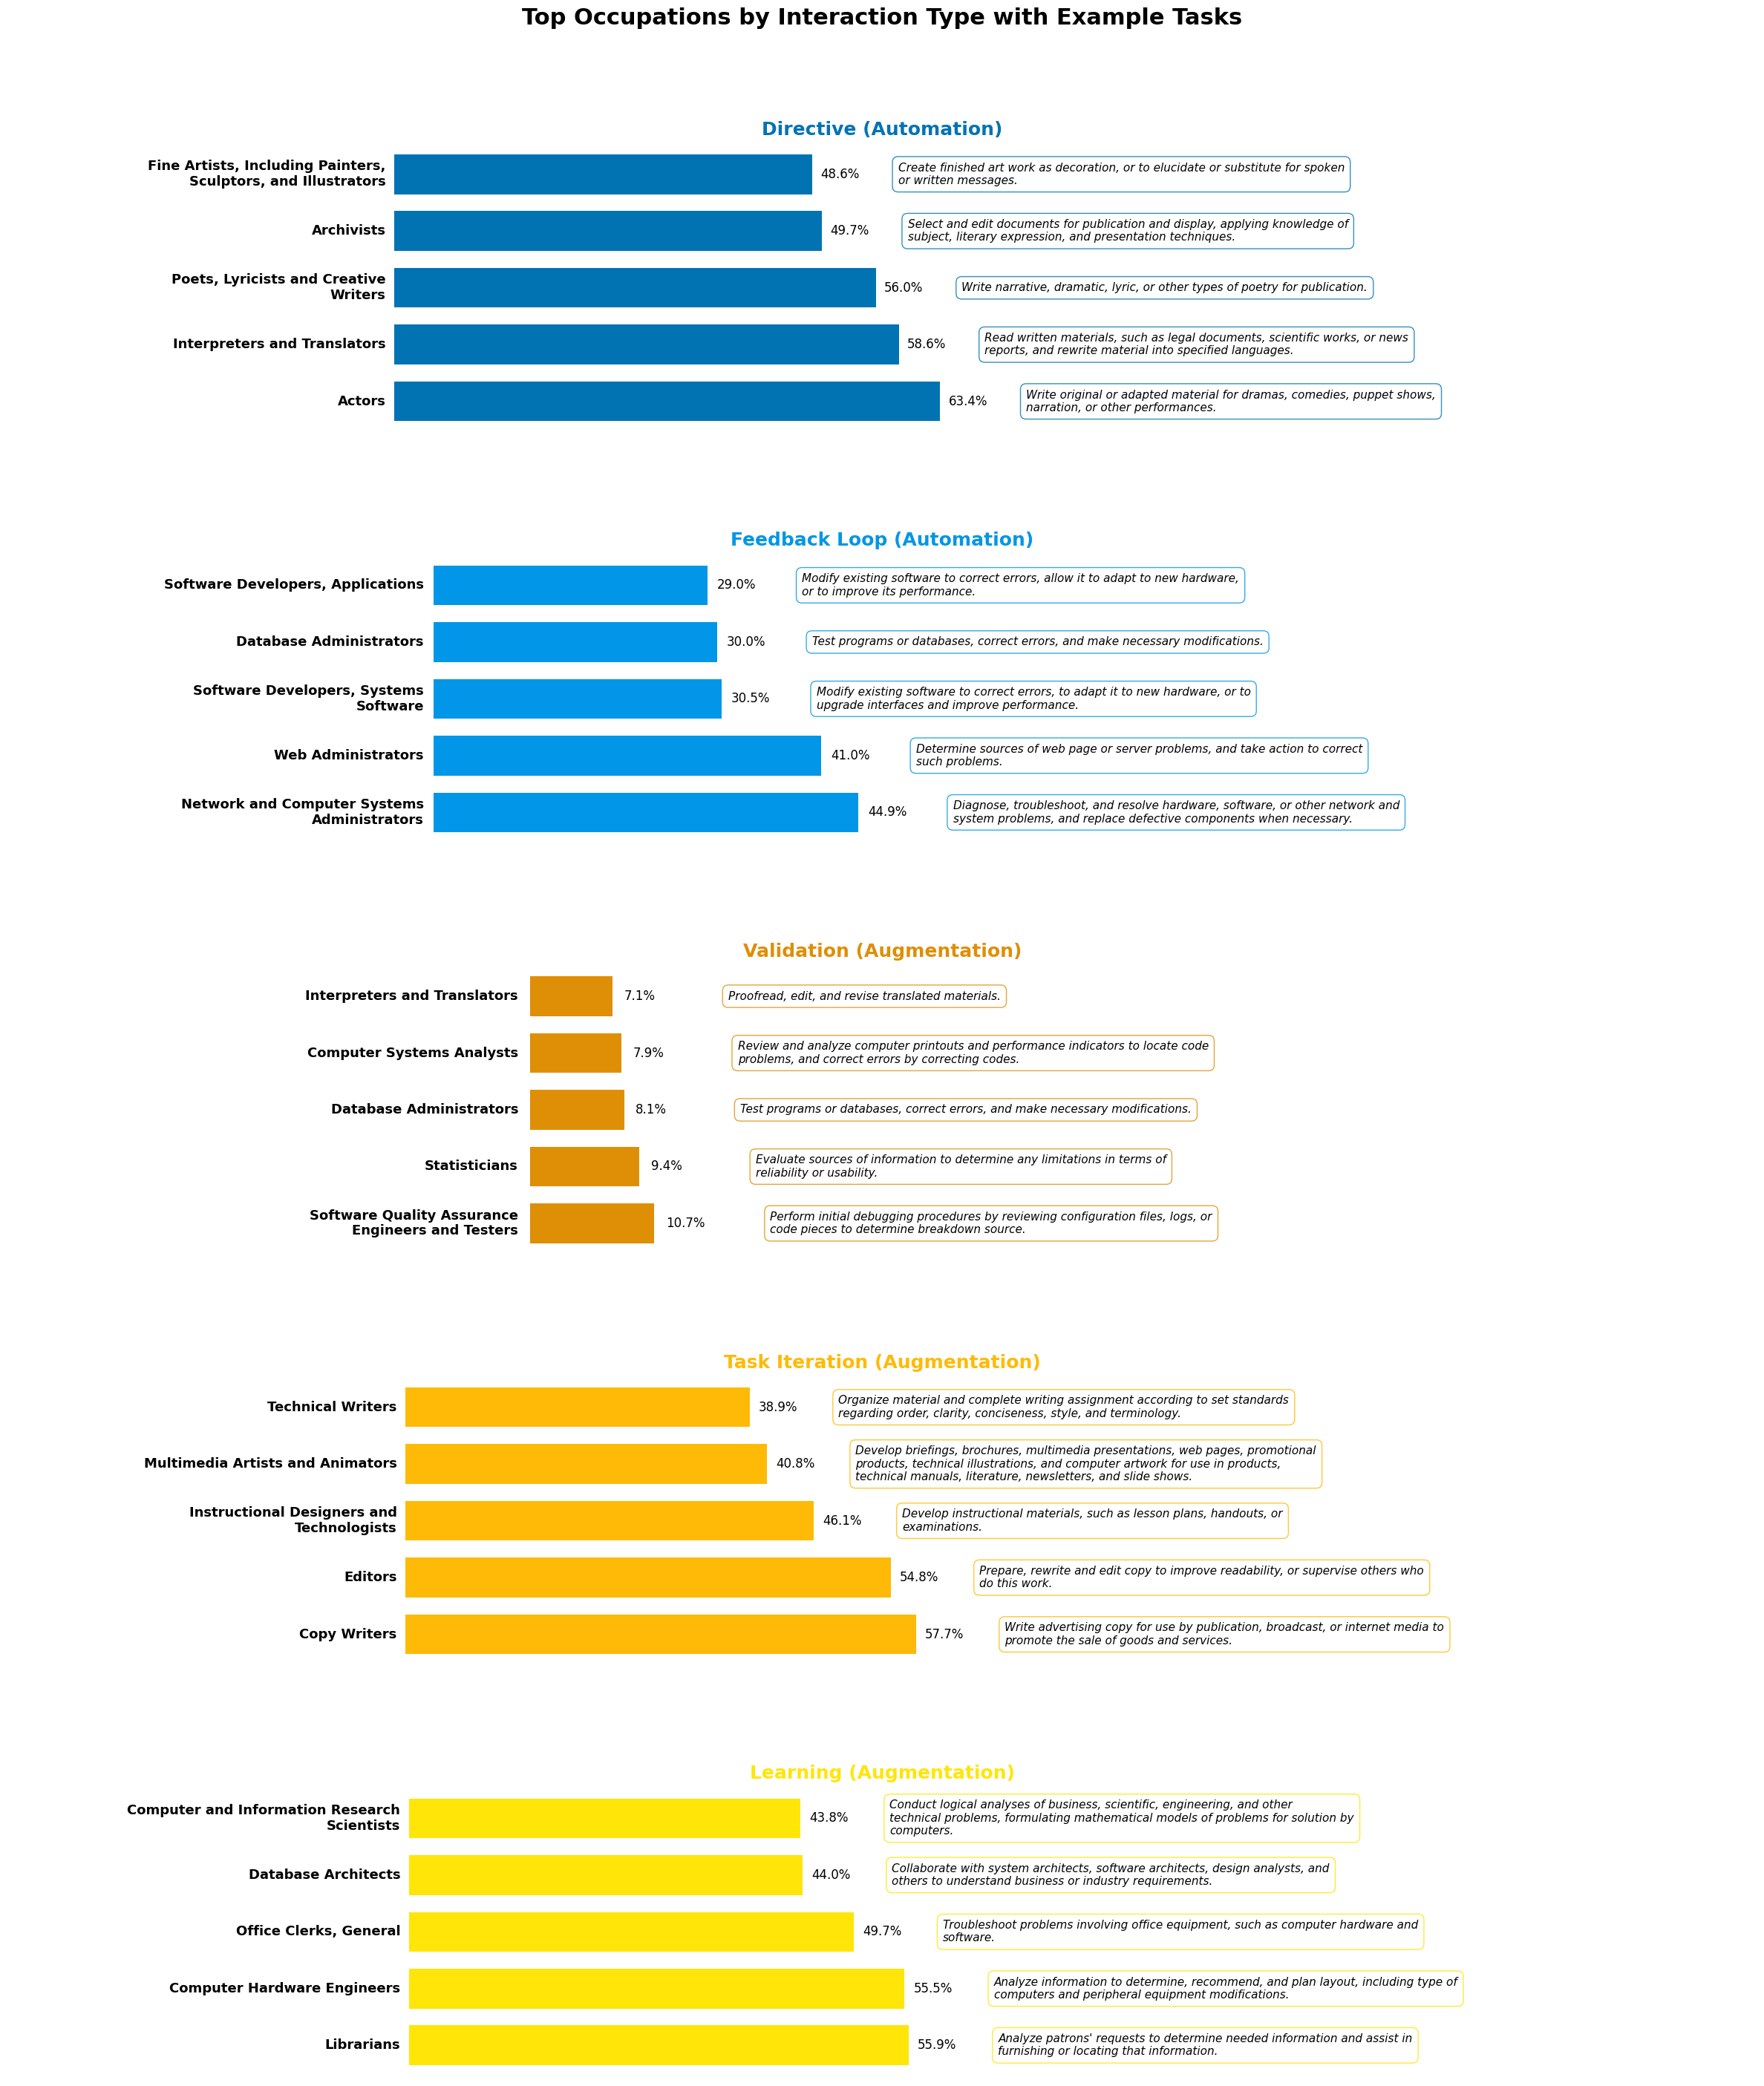

In [ ]:
def plot_top_contributing_tasks_by_interaction(automation_vs_augmentation_with_occupations, figsize=(24, 30)):
    """
    Create a visualization showing top occupations by interaction type with example tasks.
    
    Args:
        automation_vs_augmentation_with_occupations (pd.DataFrame): DataFrame with occupation and interaction data
        figsize (tuple): Figure size
        
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import numpy as np
    import pandas as pd
    from matplotlib import gridspec
    from matplotlib.patches import Patch
    from textwrap import wrap
    import seaborn as sns
    
    # Define a function to get top contributing tasks for an interaction type
    def get_top_contributing_tasks_by_interaction(interaction_type, num_occupations=5, num_tasks=3):
        """
        Get tasks that contribute most to each interaction type, for top occupations.
        """
        # Calculate weighted interaction percentages for each occupation
        base_plot_df = (automation_vs_augmentation_with_occupations.groupby("Title")["pct_occ_scaled"]
                       .sum()
                       .reset_index())
        base_plot_df = base_plot_df[base_plot_df["pct_occ_scaled"] >= 0.5]
        
        weighted_results = []
        for title in base_plot_df["Title"].unique():
            occupation_tasks = automation_vs_augmentation_with_occupations[
                automation_vs_augmentation_with_occupations["Title"] == title
            ]
            
            total_pct = base_plot_df[base_plot_df["Title"] == title]["pct_occ_scaled"].iloc[0]
            
            # Calculate weighted sum, checking for NaN values
            valid_tasks = occupation_tasks.dropna(subset=[interaction_type])
            if valid_tasks.empty:
                continue
                
            weighted_sum = (valid_tasks[interaction_type] * valid_tasks["pct_occ_scaled"]).sum()
            weighted_pct = weighted_sum / total_pct
            
            weighted_results.append({
                'Title': title,
                'percentage': weighted_pct * 100
            })
        
        # Get top occupations for this interaction type
        top_occupations = sorted(weighted_results, key=lambda x: x['percentage'], reverse=True)[:num_occupations]
        
        # Find top contributing tasks for each top occupation
        occupation_tasks = {}
        
        for occ_data in top_occupations:
            occupation = occ_data['Title']
            
            # Get tasks for this occupation
            tasks = automation_vs_augmentation_with_occupations[
                automation_vs_augmentation_with_occupations["Title"] == occupation
            ].copy()  # Use .copy() to avoid SettingWithCopyWarning
            
            # Calculate contribution score = interaction_value * task_weight
            tasks.loc[:, 'contribution_score'] = tasks[interaction_type] * tasks['pct_occ_scaled']
            
            # Filter out tasks with NaN or zero contribution scores
            valid_tasks = tasks[(~tasks['contribution_score'].isna()) & (tasks['contribution_score'] > 0)]
            
            if valid_tasks.empty:
                # If no valid tasks, still include the occupation but with no tasks
                occupation_tasks[occupation] = {
                    'percentage': occ_data['percentage'],
                    'top_tasks': []
                }
                continue
                
            # Sort by contribution score
            valid_tasks = valid_tasks.sort_values(by='contribution_score', ascending=False)
            
            # Get top contributing tasks (up to num_tasks)
            top_tasks = []
            for _, task_row in valid_tasks.head(num_tasks).iterrows():
                top_tasks.append({
                    'task_text': task_row['Task'],
                    'interaction_value': task_row[interaction_type],
                    'pct_occ_scaled': task_row['pct_occ_scaled'],
                    'contribution_score': task_row['contribution_score']
                })
            
            occupation_tasks[occupation] = {
                'percentage': occ_data['percentage'],
                'top_tasks': top_tasks
            }
        
        return occupation_tasks

    # Define interaction types and colors
    interaction_types = ['directive', 'feedback_loop', 'validation', 'task_iteration', 'learning']
    interaction_labels = {
        'directive': 'Directive',
        'feedback_loop': 'Feedback Loop',
        'validation': 'Validation',
        'task_iteration': 'Task Iteration',
        'learning': 'Learning',
    }

    # Group interactions by category
    automation_types = ['directive', 'feedback_loop']
    augmentation_types = ['validation', 'task_iteration', 'learning']

    # Set color palette and adjust brightness function
    palette = sns.color_palette("colorblind")
    
    # Function to adjust color brightness
    def adjust_color_brightness(color, factor):
        """Adjust the brightness of a color by a factor"""
        if isinstance(color, str):
            color = mcolors.to_rgb(color)
        return tuple(min(1.0, c * factor) for c in color)

    # Define colors for each interaction type
    colors = {
        'directive': palette[0],          # Orange for Automation
        'feedback_loop': adjust_color_brightness(palette[0], 1.3),      # Light orange for Automation
        'validation': palette[1],         # Blue for Augmentation
        'task_iteration': adjust_color_brightness(palette[1], 1.3),     # Light blue for Augmentation
        'learning': adjust_color_brightness(palette[1], 1.6),           # Lighter blue for Augmentation
    }

    # Create the visualization
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(5, 1, height_ratios=[1, 1, 1, 1, 1])

    # Add overall title with less space above
    plt.suptitle('Top Occupations by Interaction Type with Example Tasks', 
                 fontsize=22, y=0.98, fontweight='bold')

    # Create a plot for each interaction type
    for i, interaction in enumerate(interaction_types):
        ax = plt.subplot(gs[i])
        
        # Get data for this interaction type
        occupation_tasks = get_top_contributing_tasks_by_interaction(interaction, num_tasks=1)
        
        # If no data, continue to next interaction type
        if not occupation_tasks:
            ax.text(0.5, 0.5, f"No data available for {interaction_labels[interaction]}", 
                    ha='center', va='center', fontsize=14)
            ax.axis('off')
            continue
        
        # Sort occupations by percentage
        sorted_occupations = sorted(occupation_tasks.items(), key=lambda x: x[1]['percentage'], reverse=True)
        
        # Extract occupation names and percentages
        occupation_names = []
        occupation_pcts = []
        example_tasks = []
        
        for occ, data in sorted_occupations:
            occupation_names.append(occ)
            occupation_pcts.append(data['percentage'])
            
            # Get the top task if available
            if data['top_tasks']:
                example_tasks.append(data['top_tasks'][0]['task_text'])
            else:
                example_tasks.append("No specific task identified")
        
        # Set up the bar positions
        y_pos = np.arange(len(occupation_names))
        
        # Create a horizontal bar chart for occupations
        bars = ax.barh(y_pos, occupation_pcts, height=0.7, color=colors[interaction])
        
        # Add occupation names
        for j, (occ, pct) in enumerate(zip(occupation_names, occupation_pcts)):
            # Wrap occupation names to fit
            wrapped_occ = '\n'.join(wrap(occ, width=35))
            
            # Add occupation name to the left of the bar
            ax.text(-1, j, wrapped_occ, ha='right', va='center', fontsize=13, fontweight='bold')
            
            # Add percentage at the end of the bar
            ax.text(pct + 1, j, f"{pct:.1f}%", ha='left', va='center', fontsize=12)
            
            # Add example task as annotation if available
            task_text = example_tasks[j]
            if task_text != "No specific task identified":
                wrapped_task = '\n'.join(wrap(task_text, width=80))
                
                # Add example task as a text box to the right of percentage
                text_box = ax.text(pct + 10, j, wrapped_task, ha='left', va='center', 
                                  fontsize=11, style='italic', bbox=dict(facecolor='white', 
                                                                        alpha=0.8, 
                                                                        boxstyle='round,pad=0.5',
                                                                        edgecolor=colors[interaction]))
        
        # Customize the plot
        max_pct = max(occupation_pcts) if occupation_pcts else 0
        ax.set_xlim(-45, max_pct + 95)  # Leave space for labels and task boxes
        ax.set_yticks([])  # Remove y-ticks since we have text labels
        
        # Remove x-axis labels and ticks
        ax.set_xticks([])
        
        # Add grid lines
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        ax.set_axisbelow(True)  # Place gridlines behind bars
        
        # Add title for this interaction type
        title_color = colors[interaction]
        category = "Automation" if interaction in automation_types else "Augmentation"
        ax.set_title(f"{interaction_labels[interaction]} ({category})", 
                     fontsize=18, fontweight='bold', color=title_color)
        
        # Remove spines
        for spine in ['top', 'right', 'left', 'bottom']:
            ax.spines[spine].set_visible(False)

    # Adjust layout with less space at the top
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.05, hspace=0.4)

# Call the function if data is available
if 'automation_vs_augmentation_with_occupations' in globals():
    plot_top_contributing_tasks_by_interaction(automation_vs_augmentation_with_occupations)